<a href="https://colab.research.google.com/github/BrandonGordon9/AI-Homework/blob/master/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Concepts

## Artificial Intelligence

Branch of computer science dealing with the simulation of intelligent, human-like behaviors in computers


## Machine Learning

A subset of AI which deals with computers learning dynamically without the need for humans

## Deep Learning

A subset of Machine Learning which involves computers learning unsupervised with no labels

## Supervised Learning

A type of machine learning where the model is given labeled training data.
A process called training is performed which involves giving the algorithm a set of features.  
The relationship is determined and then the model can make future predictions based on what was learned.

## Unsupervised Learning 

A type of machine learning where the machine learns from an unlabeled set of data.

## Reinforcement Learning

Instead of using labels, the machine learns by trying to reach a certain reward over and over again.

# Building a Model

## Terminology

Label: The thing we are predicting

Feature: An input variable

Example: An instance of data 

Labeled Example: Contains both features and the label

Training: The process of creating or learning the model

Regression Model: Predicts continuous values

Classification Model: Predicts discrete values (is this a cat or a dog?)

## Equation for a model

y' = b + w1*x1

where

y: the predicted label (desired output)

b: the bias 

w1: the weight of feature 1

x1: a feature (known input)

## Training and Loss

Training refers to the machine learning from labeled examples.

Loss is the penalty for a bad prediction.  

The ultimate goal of training is to find weights and biases with the least loss possible.

Gradient descent is a very useful process to minimize loss while learning by comparing the gradient of loss (derivative) at different points.

Stochastic gradient descent uses a single example per iteration.

# Comping a model

## Exploring different learning rates in gradient descent

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gradient Descent

In [0]:
class GradientDescent():
  
  def __init__(self, f, f_prime, lr, x_init, a_init, b_init):
    self.f = f
    self.f_prime = f_prime
    self.xs = [x_init]
    self.a = a_init
    self.b = b_init
    self.lr = lr
  
  def step(self, num_steps=1):
    for _ in range(num_steps):
      x = self.xs[-1]
    
      # one step of gradient descent
      x = x - self.lr * self.f_prime(x)
    
      # update
      self.xs.append(x)
      self.a = min(self.xs[-1], self.a)
      self.b = max(self.xs[-1], self.b)
    
  def plot(self):
     
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.grid(True)
    
    # plot function
    x_axis = np.linspace(self.a, self.b)
    ax.plot(x_axis, [self.f(x) for x in x_axis])
    
    # plot all points encountered during gradient descent
    ax.scatter(self.xs, [self.f(x) for x in self.xs])

## What can go wrong with gradient descent?

### Divergence

In [0]:
def f(x):
    return 2.0 * (x - 2.0)**2

def f_prime(x):
    return 4.0 * (x - 2.0)

In [0]:
GD = GradientDescent(f, f_prime, lr=1.0, x_init=0.0, a_init=0.0, b_init=4.0)

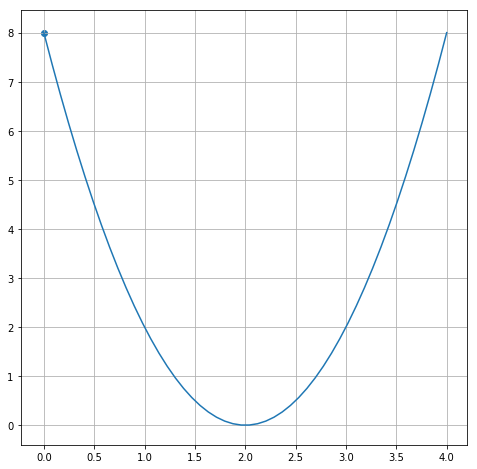

In [0]:
GD.plot()

In [0]:
GD.step(4)

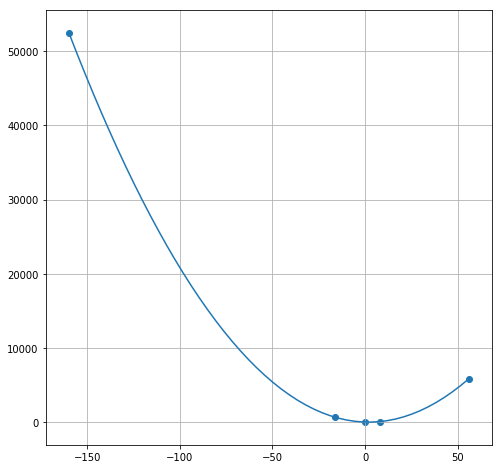

In [0]:
GD.plot()

### Getting stuck in a local minimum

In [0]:
def g(x):
  return x ** 4 + 2 * (x - 0.1) ** 3 - x

def g_prime(x):
  return 4 * x ** 3 + 6 ** (x - 0.1) ** 2 - 1

In [0]:
GD = GradientDescent(g, g_prime, lr=0.05, x_init=1.0, a_init=-2.0, b_init=1.0)

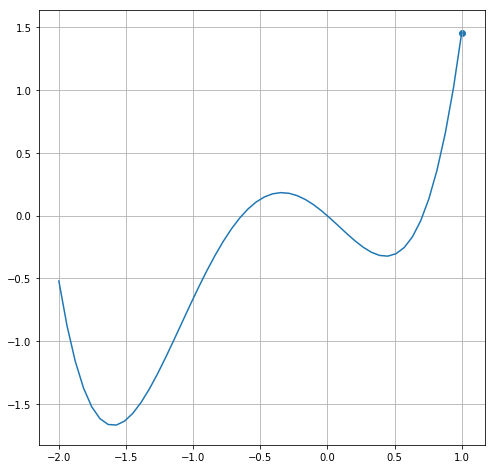

In [0]:
GD.plot()

In [0]:
GD.step(10)

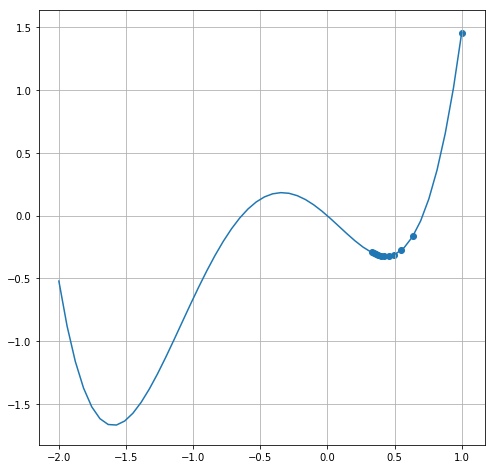

In [0]:
GD.plot()

# Training a Model

Overfitting is a big problem in machine learning. It can be described as a model being more complex than necessary. This can result in low loss during training but a bad job in predicting new data.

## Example of a graph where Overfitting occurs 

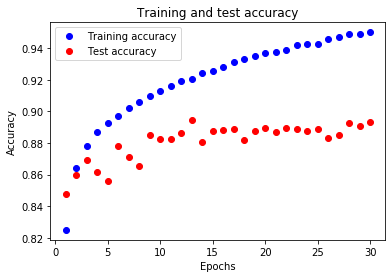

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Underfitting is also a problem. It occurs when the model is not complex enough to recognize relationships during training.

## Example of a graph where Underfitting occurs

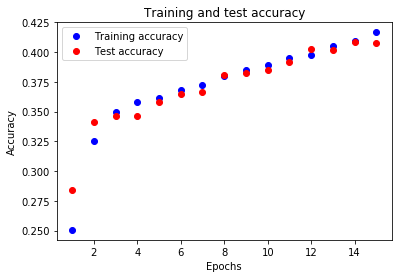

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Finetuning a pretrained model

Once you have trained a model, the next step is to keep changing the parameters so you can increased the model's correct prediction rate. This process can take a long time if you have many, many features. Running training on a complex neural network can take many hours or longer depending on the complexity.  The training below from Homework 3 took around 90 minutes to finish when using a good GPU.

Using TensorFlow backend.


***** GPU Information *****
Device Name:  /device:GPU:0
Memory Limit:  15.96 GB
Description:  device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
Found 42000 images belonging to 6 classes.
Found 90 images belonging to 6 classes.














343613440/343610240 [==============================] - 7s 0us/step

### LEVEL1 ###
pretrained network:
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn

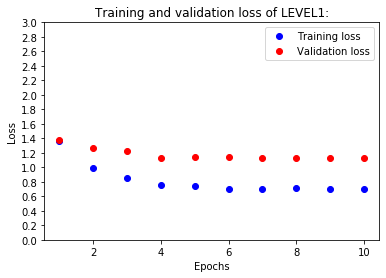

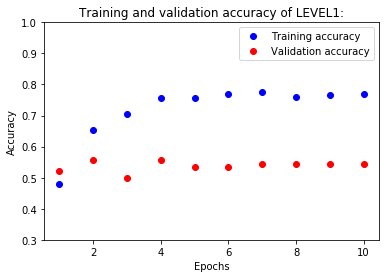


### LEVEL1 Training finished successfully ###

Loading trained weights from /content/HW3/trained_models/trained_weights/weights_temp.h5 ...

### Saving Level1 Model to  /content/HW3/trained_models/RuTanks7000_vf_l1.h5  ... 


### LEVEL2 ###

Loading trained weights from /content/HW3/trained_models/trained_weights/weights_temp.h5 ...

trainable layers before unfreezing the base network up to normal_add_1_15:  510
trainable layers after the base network unfreezed from layer normal_add_1_15:  71

LEVEL2 Model after unfreezing the base network
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None,

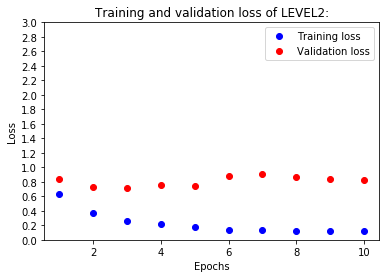

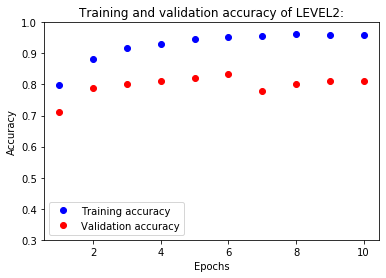


###LEVEL2 Training finished successfully ###
Time elapsed in minutes:  82.45201194173333


In [0]:
# Ugur Uysal
# ugur.uysal.86@gmail.com
# 02. Aug 2019

# imports
import os
from keras.applications import NASNetLarge
from keras import models, layers, optimizers, backend
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
from tensorflow.python.client import device_lib

# check for optimal GPU
for x in device_lib.list_local_devices():
   if x.device_type == "GPU":                    
     print("***** GPU Information *****")
     print("Device Name: " , x.name)
     print("Memory Limit: " , "%.2f" % float(x.memory_limit/(1000*1000*1000)), "GB")
     print("Description: " , x.physical_device_desc)

def main():
    start = timer()
    level1()  # Training the classifier only
    level2()  # Training the pretrained model + the trained classifier from level 1
    end = timer()
    print("Time elapsed in minutes: ", ((end - start)/60))

# Setting Parameters ##################################################################
# image settings
img_height,img_width = 331, 331  # For NASNetLarge

# classes
classnames = ["Background", "BMP2", "Buk-M1-2", "T14", "T90", "ZSU23"] # removed Civilian Cars class
classes = len(classnames)

# path settings
path = '/content/HW3/'
dataset_path = path + 'datasets/'
weights_path = path + 'trained_models/trained_weights/weights_temp.h5'
model_path = path + 'trained_models/RuTanks7000_vf_'
TensorBoardLogDir = path + 'logs'

nbrTrainImages = 7000  # per class
nbrTestImages = 0  # Value gets accurate after counting (Total Number of test images)
for ImagesClass in os.listdir(dataset_path+'RuTanks7000_vf/test/'):
    nbrTestImages += len(os.listdir(dataset_path+'RuTanks7000_vf/test/'+ImagesClass))

# unfreezing the base network up to a specific layer in Level2:
freezeUptoLayer = "normal_add_1_15"   # NASNetLarge

# hyperparameters
learning_rate = 0.0002  # Learning_rate in Level 2 = learning_rate/10
lr_decay = 0.0001
batch = 64
fcLayer1 = 32
dropout = 0.5

epochsL1 = 10
patiencel1 = 1
factorL1 = 0.5

epochsL2 = 10
patiencel2 = 1
factorL2 = 0.5

verbose_train = 1

# datagenerators https://keras.io/preprocessing/image/
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    dataset_path+'RuTanks7000_vf/train',
    target_size=(img_height, img_width),
    batch_size=batch,
    shuffle=True,
    classes=classnames,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_path+'RuTanks7000_vf/test',
    target_size=(img_height, img_width),
    batch_size=1,
    shuffle=True,
    classes=classnames,
    class_mode='categorical')
#########################################################################################

# function to plot results of model performance
def plot(h,t,e):
    history_dict = h[0]
    loss_values = history_dict['loss']
    validation_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    validation_acc_values = history_dict['val_acc']
    epochs_range = range(1, e + 1)

    # Plotting Training and Validation loss of the corresponding Model
    plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
    plt.plot(epochs_range, validation_loss_values, 'ro', label='Validation loss')
    plt.title('Training and validation loss of ' + t)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yticks(np.arange(0, 3.1, step=0.2))
    plt.legend()
    plt.show()

    # Plotting Training and Validation accuracy of the corresponding Model
    plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs_range, validation_acc_values, 'ro', label='Validation accuracy')
    plt.title('Training and validation accuracy of ' + t)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.yticks(np.arange(0.3, 1.1, step=0.1))
    plt.legend()
    plt.show()


# LEVEL1 - Training of densely connected layers
def level1():
    # Building the model using the pretrained model
    conv_base1 = NASNetLarge(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    print("\n### LEVEL1 ###\npretrained network:")
    conv_base1.summary()
    model = models.Sequential()
    model.add(conv_base1)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(fcLayer1, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(classes, activation='softmax'))

    # freezing the base network
    print("trainable layers bevor freezing:", int(len(model.trainable_weights)/2)) # weights = weights + bias = 2 pro layer
    conv_base1.trainable = False
    print("trainable layers after freezing:", int(len(model.trainable_weights)/2))
    print("\npretrained network + densely connected classifier")
    model.summary()

    # training the added layers only
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate, decay=lr_decay), metrics=['acc'])

    callbacks_list_L1 = [ModelCheckpoint(filepath=weights_path, save_weights_only=True, monitor='val_acc', verbose=1, save_best_only=True),
                      ReduceLROnPlateau(monitor='val_acc', factor=factorL1, patience=patiencel1, verbose=1),
                      TensorBoard(log_dir=TensorBoardLogDir+'\\level1')]

    print("\n### Level1 Training ... ")
    # training the model
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=(nbrTrainImages * classes) // (batch*5),
        epochs=epochsL1,
        callbacks=callbacks_list_L1,
        validation_data=test_generator,
        validation_steps=nbrTestImages,
        verbose=verbose_train)

    history_val1 = [history.history]  # saving all results of the final test
    plot(history_val1, "LEVEL1:", epochsL1)
    print("\n### LEVEL1 Training finished successfully ###")

    print("\nLoading trained weights from " + weights_path + " ...")
    model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate), metrics=['acc'])
    print("\n### Saving Level1 Model to ", model_path+'l1.h5', " ... ")
    model.save(model_path+'l1.h5')


# LEVEL2 - Training pretrained network and trained densely connected layers
def level2():
    # Destroying the current TF graph - https://keras.io/backend/
    backend.clear_session()
    print("\n### LEVEL2 ###")
    conv_base2 = NASNetLarge(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    model2 = models.Sequential()
    model2.add(conv_base2)
    model2.add(layers.GlobalAveragePooling2D())
    model2.add(layers.Dense(fcLayer1, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(classes, activation='softmax'))

    print("\nLoading trained weights from " + weights_path + " ...")
    model2.load_weights(weights_path)

    # unfreezing the base network up to a specific layer:
    if freezeUptoLayer == "":
        conv_base2.trainable = True
        print ("\ntrainable layers: ",int(len(model2.trainable_weights) / 2))
    else:
        print("\ntrainable layers before unfreezing the base network up to " + freezeUptoLayer + ": ",int(len(model2.trainable_weights) / 2))  # weights = weights + bias = 2 pro layer
        conv_base2.trainable = True
        set_trainable = False
        for layer in conv_base2.layers:
            if layer.name == freezeUptoLayer: set_trainable = True
            if set_trainable: layer.trainable = True
            else: layer.trainable = False
        print("trainable layers after the base network unfreezed from layer " + freezeUptoLayer + ": ", int(len(model2.trainable_weights)/2))

    print("\nLEVEL2 Model after unfreezing the base network")
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate/10, decay=lr_decay), metrics=['acc'])
    print ("\n### Validating ... ")

    val_loss, val_acc = model2.evaluate_generator(test_generator, steps=nbrTestImages, verbose=0)
    print('Validation Results before training unfreeze layers and trained densely connected layers:\nValidation loss:',val_loss,",",'Validation accuracy:', val_acc, "\n")

    # Jointly training both the unfreeze layers and the added trained densely connected layers
    callbacks_list_L2 = [ModelCheckpoint(filepath=model_path+'l2.h5', save_weights_only=False, monitor='val_acc', verbose=1, save_best_only=True),
                      ReduceLROnPlateau(monitor='val_acc', factor=factorL2, patience=patiencel2, verbose=1),
                      TensorBoard(log_dir=TensorBoardLogDir+'\\level2')]

    print ("\n### Level2 Training ... ")
    history = model2.fit_generator(
        train_generator,
        steps_per_epoch=(nbrTrainImages * classes) // (batch*5),
        epochs=epochsL2,
        callbacks=callbacks_list_L2,
        validation_data=test_generator,
        validation_steps=nbrTestImages,
        verbose=verbose_train)

    history_val2 = [history.history]  # saving all results of the final test
    plot(history_val2, "LEVEL2:", epochsL2)
    print("\n###LEVEL2 Training finished successfully ###")


main()

# References
# Chollet, F. (2018). Deep learning with Python. Section 5.3 - Using a pretrained convnet.